### Part 1. Imbalanced dataset

In [1]:
!pip install imbalanced-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


plt.style.use('seaborn')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)

[Thyroid Disease Data Set](https://archive.ics.uci.edu/ml/datasets/thyroid+disease): classify patients

In [25]:
df = pd.read_csv('thyroid_disease.csv')

In [4]:
df.shape

(3772, 30)

In [5]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative


In [6]:
df['Class'].value_counts()

negative    3541
sick         231
Name: Class, dtype: int64

In [7]:
np.round(df.isnull().mean()*100)

age                            0.0
sex                            4.0
on_thyroxine                   0.0
query_on_thyroxine             0.0
on_antithyroid_medication      0.0
sick                           0.0
pregnant                       0.0
thyroid_surgery                0.0
I131_treatment                 0.0
query_hypothyroid              0.0
query_hyperthyroid             0.0
lithium                        0.0
goitre                         0.0
tumor                          0.0
hypopituitary                  0.0
psych                          0.0
TSH_measured                   0.0
TSH                           10.0
T3_measured                    0.0
T3                            20.0
TT4_measured                   0.0
TT4                            6.0
T4U_measured                   0.0
T4U                           10.0
FTI_measured                   0.0
FTI                           10.0
TBG_measured                   0.0
TBG                          100.0
referral_source     

### Задание 1. 

Есть ли в данных бесполезные колонки? Если да, удалите их.

In [26]:
# YOUR CODE HERE
to_delete = ['TBG', 'TBG_measured']
df.drop(to_delete, axis=1, inplace=True)

### Задание 2. 

Ипользуя `LabelEncoder` закодируйте целевую переменную.

In [9]:
from sklearn.preprocessing import LabelEncoder

In [27]:
# YOUR CODE HERE
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [21]:
np.unique(df['Class'], return_counts=True)

(array([0, 1]), array([3541,  231], dtype=int64))

### Категориальные переменные

In [12]:
df.describe(include='object')

,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,referral_source
count,3622,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,5
top,F,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,t,t,t,other
freq,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,...,3738,3676,3771,3588,3403,3003,3541,3385,3387,2201


In [28]:
categorical = list(df.iloc[:,(df.dtypes == "object").values].columns)

In [14]:
df.groupby(['sex']).Class.mean()

sex
F    0.054839
M    0.077933
Name: Class, dtype: float64

C:\Users\Nobody\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


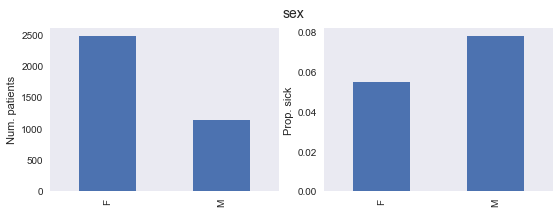

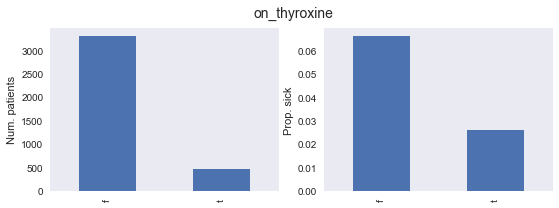

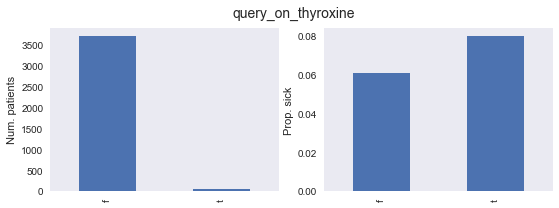

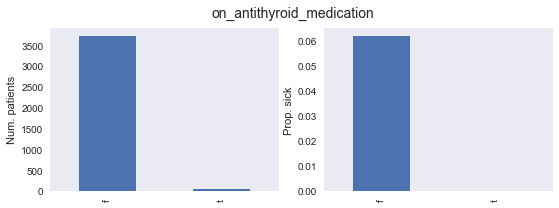

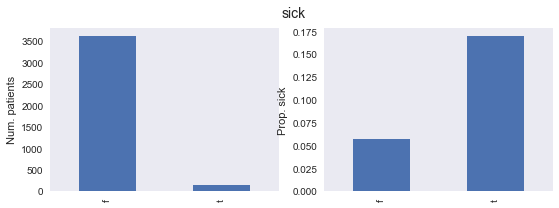

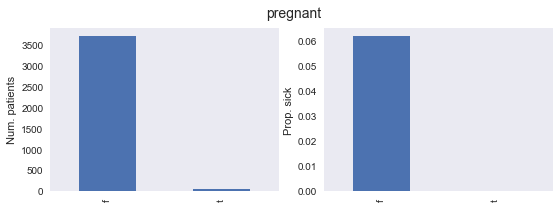

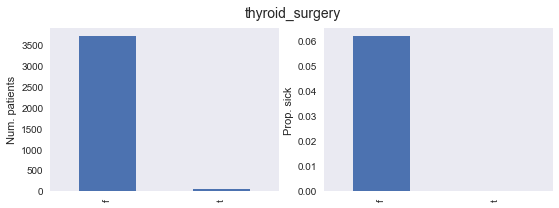

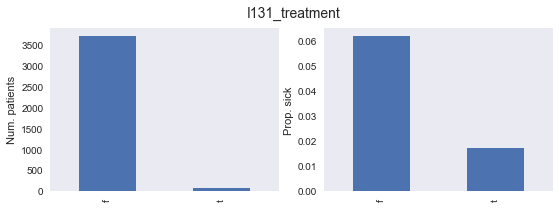

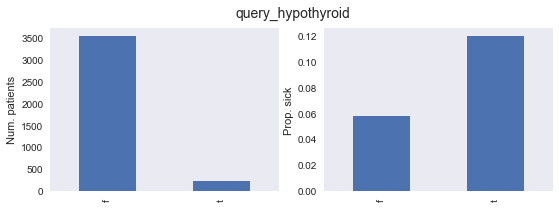

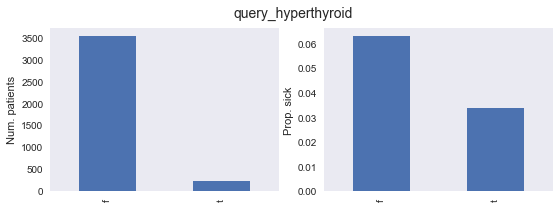

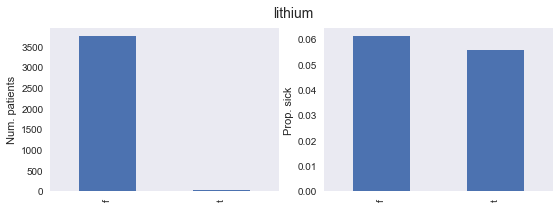

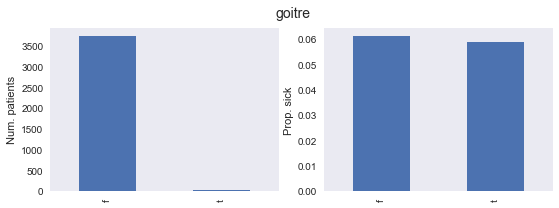

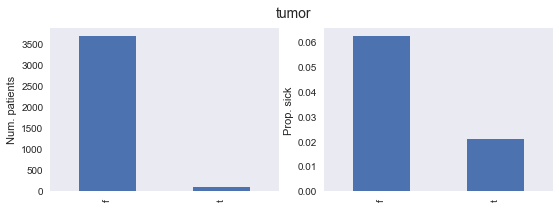

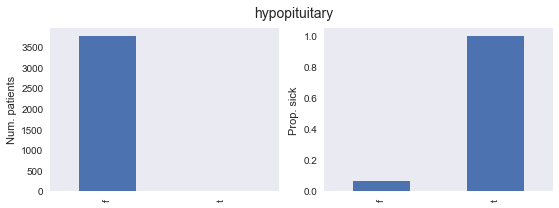

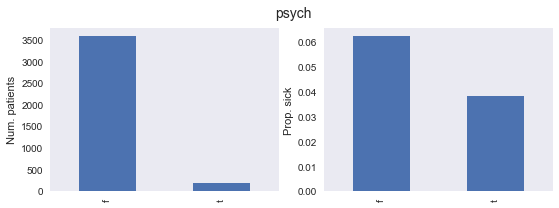

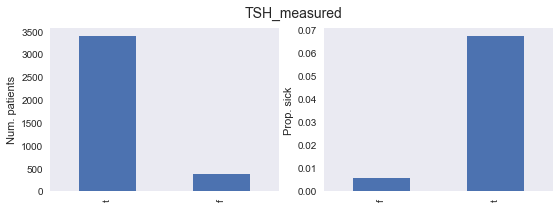

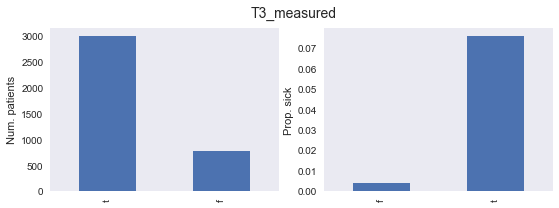

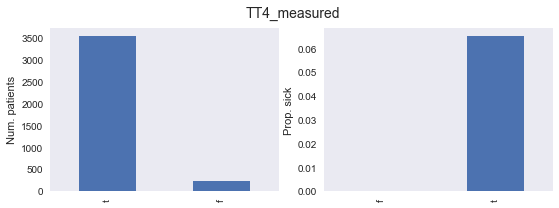

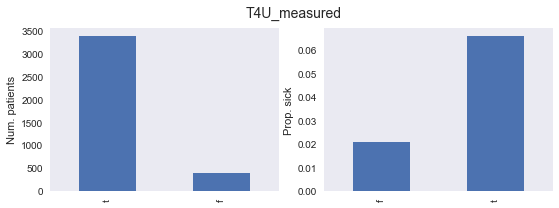

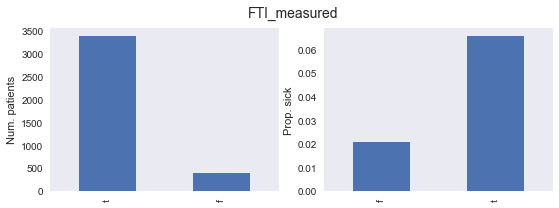

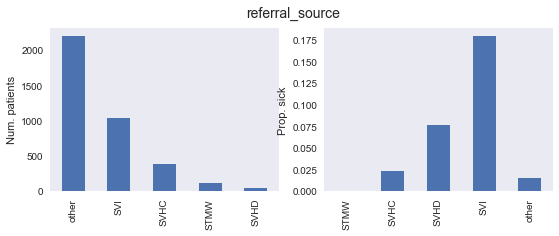

In [15]:
for c in categorical:
    fig, ax = plt.subplots(ncols=2, figsize=(9,3))
    # plot counts
    df[c].value_counts().plot(kind='bar', ax=ax[0])
    
    # plot proportion of positive class
    grouped = df.groupby([c]).Class.mean()
    grouped.plot(kind='bar', ax=ax[1])
    
    # add column name to the title
    fig.suptitle(c, fontsize=14)
    
    # prettify
    ax[0].grid()
    ax[0].set_ylabel('Num. patients')
    ax[1].set_xlabel('')
    ax[1].grid()
    ax[1].set_ylabel('Prop. sick')

In [29]:
df['hypopituitary'].value_counts()

f    3771
t       1
Name: hypopituitary, dtype: int64

In [30]:
df.drop('hypopituitary', axis=1, inplace=True)
categorical.remove('hypopituitary')

In [31]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,Class
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,3772.000000
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,0.061241
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,0.239803
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,0.000000
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,0.000000
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,0.000000
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,0.000000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,1.000000


In [32]:
numerical = list(df.iloc[:,(df.dtypes != "object").values].columns)
numerical.remove('Class')

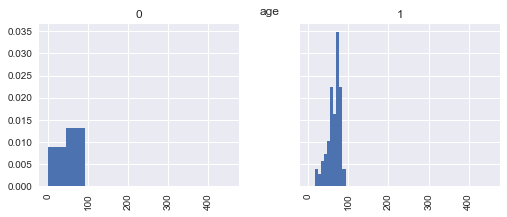

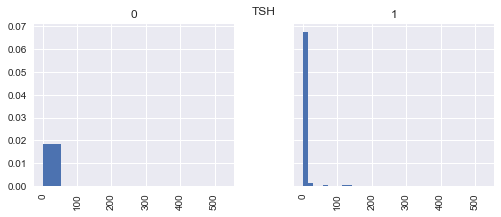

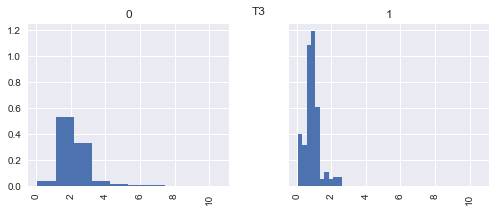

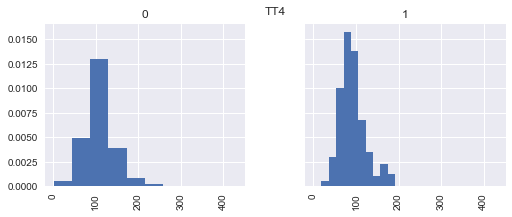

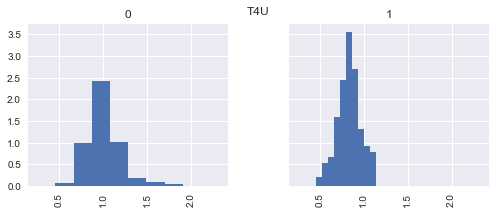

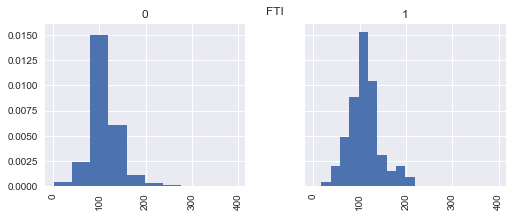

In [33]:
for c in numerical:
    df.hist(column=c, by='Class', bins=10, sharey=True, sharex=True, figsize=(8,3), density=True);
    plt.suptitle(c)

In [34]:
### Выделим целевую переменную
y = df['Class']
X = df.drop(['Class'], axis=1)

Разобъем данные на тренировочную и тестовую выборки

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(np.round((y_train == 1).mean(), 4), np.round((y_test == 1).mean(), 4))

(2829, 26) (943, 26) (2829,) (943,)
0.0633 0.0551


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=13)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(np.round((y_train == 1).mean(), 4), np.round((y_test == 1).mean(), 4))

(2829, 26) (943, 26) (2829,) (943,)
0.0612 0.0615


### Задание 3: Препроцессинг данных

* Категориальные переменные:
    - заполните пропуски значением `unknown`
    - закодировать 'OneHotEncoder'
* Числовые признаки
     - заполнить пропуски средним


Будем использовать комбинацию `make_pipeline` и `ColumnTransformer`

* `make_pipeline` - позволяет объединить несколько трансформеров в один
* `ColumnTransformer` - позволяет применять разные трансформеры / пайплайны к разным колонкам

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [38]:
# define tranformation/pipeline to preprocess categorical features
categ_transform = make_pipeline(
                    # your code here
                    SimpleImputer(strategy='constant', fill_value='unknown'),
                    OneHotEncoder()
                    )

# define tranformation/pipeline to preprocess numeric features
numeric_transform = SimpleImputer(strategy='mean') # your code here

`ColumnTransformer` принимает на вход список трансформаций. Для каждой можно задать имя и список фичей, к которым применить транформацию:

```
ColumnTransformer([
    ('name1', transorm1, column_names1),
    ('name2', transorm2, column_names2)
])
```

Также стоит обратить внимание на аргумент `remainder='passthrough'`, если вы хотите оставить некоторые колонки нетронутыми.

In [39]:
column_transformer = ColumnTransformer([
    # YOUR CODE HERE
    ('categ_prep', categ_transform, categorical),
    ('numeric_prep', numeric_transform, numerical)],
    remainder='passthrough')


X_train = column_transformer.fit_transform(X_train) # YOUR CODE HERE
X_test =  column_transformer.transform(X_test) # YOUR CODE HERE

### Обучение и вывод метрик

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# матрица ошибок
def compute_confusion_matrix(y_test, y_pred):
    return pd.DataFrame(
        confusion_matrix(y_test, y_pred, labels=[1, 0]),
        columns=['a(x) = 1', 'a(x) = 0'],
        index=['y = 1', 'y = 0'],
    ).T

# метрики
def compute_metrics(y_test, y_pred):
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('F-score: {:.2f}'.format(f1_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
    return f1_score(y_test, y_pred)

In [41]:
test_results  = {}

### Задание 4
Заполните пропуски в функции eval_model, используйте ее для обучение RandomForest c 50 деревьями.

In [42]:
def eval_model(model, X_train, y_train, X_test, y_test):
    # fit model
     # YOUR CODE HERE
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # compute cofusion matrix
     # YOUR CODE HERE
    print(compute_confusion_matrix(y_test, y_pred))
    
    # compute metrics
     # YOUR CODE HERE
    score = compute_metrics(y_test, y_pred)
    return score


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, random_state=13)
f_score = eval_model(rf, X_train, y_train, X_test, y_test)

          y = 1  y = 0
a(x) = 1     45      4
a(x) = 0     13    881
Accuracy: 0.98
F-score: 0.84
Precision: 0.92
Recall: 0.78


In [44]:
test_results['RF'] = f_score

In [45]:
rf = RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=13)
test_results['RF balanced'] = eval_model(rf, X_train, y_train, X_test, y_test)

          y = 1  y = 0
a(x) = 1     45      4
a(x) = 0     13    881
Accuracy: 0.98
F-score: 0.84
Precision: 0.92
Recall: 0.78


In [46]:
(y_train == 1).mean(), (y_test == 1).mean()

(0.06115235065394132, 0.061505832449628844)

# Undersampling

## Random

In [47]:
from imblearn.under_sampling import RandomUnderSampler

In [48]:
us = RandomUnderSampler(random_state=13)
X_train_rs, y_train_rs = us.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)

(2829, 50) (346, 50)


In [49]:
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced', )
test_results['Random Undersamp.'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

          y = 1  y = 0
a(x) = 1     56     25
a(x) = 0      2    860
Accuracy: 0.97
F-score: 0.81
Precision: 0.69
Recall: 0.97


Слишком мало тренировочных данных. Уберем поменьше

In [50]:
us = RandomUnderSampler(sampling_strategy=0.2, random_state=13)
X_train_rs, y_train_rs = us.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)

(2829, 50) (1038, 50)


In [51]:
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced', )
test_results['Random Undersamp.'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

          y = 1  y = 0
a(x) = 1     50      6
a(x) = 0      8    879
Accuracy: 0.99
F-score: 0.88
Precision: 0.89
Recall: 0.86


## NearMiss

In [52]:
from imblearn.under_sampling import NearMiss

us = NearMiss(sampling_strategy=0.2, n_neighbors=3, version=1)
X_train_rs, y_train_rs = us.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)

(2829, 50) (1038, 50)


In [53]:
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['NearMiss-1'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

          y = 1  y = 0
a(x) = 1     57     36
a(x) = 0      1    849
Accuracy: 0.96
F-score: 0.75
Precision: 0.61
Recall: 0.98


In [54]:
us = NearMiss(sampling_strategy=0.2, n_neighbors=3, version=2)
X_train_rs, y_train_rs = us.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['NearMiss-2'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

(2829, 50) (1038, 50)
          y = 1  y = 0
a(x) = 1     57     60
a(x) = 0      1    825
Accuracy: 0.94
F-score: 0.65
Precision: 0.49
Recall: 0.98


In [55]:
us = NearMiss(sampling_strategy=0.2, n_neighbors=3, version=3)
X_train_rs, y_train_rs = us.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['NearMiss-3'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

(2829, 50) (541, 50)
          y = 1  y = 0
a(x) = 1     51      8
a(x) = 0      7    877
Accuracy: 0.98
F-score: 0.87
Precision: 0.86
Recall: 0.88


C:\Users\Nobody\anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


# Oversampling

## Random

In [56]:
from imblearn.over_sampling import RandomOverSampler

In [57]:
os = RandomOverSampler(sampling_strategy=0.8, random_state=13)
X_train_rs, y_train_rs = os.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)

(2829, 50) (4780, 50)


In [58]:
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['Random Oversamp.'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

          y = 1  y = 0
a(x) = 1     46      4
a(x) = 0     12    881
Accuracy: 0.98
F-score: 0.85
Precision: 0.92
Recall: 0.79


## SMOTE

In [59]:
from imblearn.over_sampling import SMOTE
os = SMOTE(sampling_strategy=0.8, k_neighbors=5, random_state=13)
X_train_rs, y_train_rs = os.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)

(2829, 50) (4780, 50)


In [60]:
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['SMOTE'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

          y = 1  y = 0
a(x) = 1     48      4
a(x) = 0     10    881
Accuracy: 0.99
F-score: 0.87
Precision: 0.92
Recall: 0.83


## BorderlineSMOTE

In [61]:
from imblearn.over_sampling import BorderlineSMOTE
os = BorderlineSMOTE(sampling_strategy=0.8, kind='borderline-1', random_state=13)
X_train_rs, y_train_rs = os.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)

(2829, 50) (4780, 50)


In [62]:
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['BorderlineSMOTE-1'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

          y = 1  y = 0
a(x) = 1     49      5
a(x) = 0      9    880
Accuracy: 0.99
F-score: 0.88
Precision: 0.91
Recall: 0.84


In [63]:
os = BorderlineSMOTE(sampling_strategy=0.8, kind='borderline-2', random_state=13)
X_train_rs, y_train_rs = os.fit_resample(X_train, y_train)
print(X_train.shape, X_train_rs.shape)

(2829, 50) (4780, 50)


In [64]:
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['BorderlineSMOTE-2'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

          y = 1  y = 0
a(x) = 1     49      6
a(x) = 0      9    879
Accuracy: 0.98
F-score: 0.87
Precision: 0.89
Recall: 0.84


### Задание 5

* Используя SMOTE увеличьте долю миноритораного класса до 0.5 (oversampling)
* Используя NearMiss-2 увеличьте долю миноритораного класса до 1 (undersampling)
* Обучить модель на полученной выборке

In [65]:
# oversampling
# YOUR CODE HERE
os = BorderlineSMOTE(sampling_strategy=0.5, kind='borderline-1', random_state=13)
X_train_rs, y_train_rs = os.fit_resample(X_train, y_train)

# undersampling
# YOUR CODE HERE
us = NearMiss(sampling_strategy=1, n_neighbors=3, version=3)
X_train_rs, y_train_rs = us.fit_resample(X_train_rs, y_train_rs)

# train model
# YOUR CODE HERE
rf = RandomForestClassifier(n_estimators=50, random_state=13, class_weight='balanced')
test_results['Combined'] = eval_model(rf, X_train_rs, y_train_rs, X_test, y_test)

C:\Users\Nobody\anaconda3\lib\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


          y = 1  y = 0
a(x) = 1     52     11
a(x) = 0      6    874
Accuracy: 0.98
F-score: 0.86
Precision: 0.83
Recall: 0.90


### Final Plot

(0.8, 0.9)

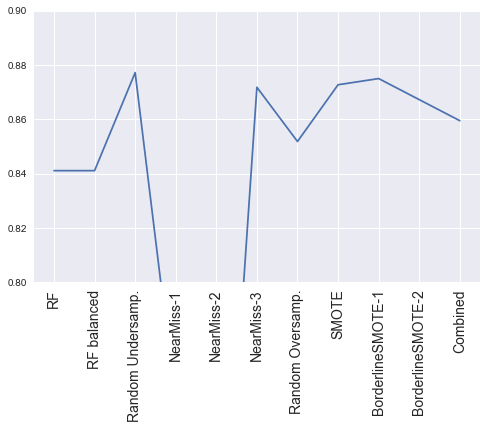

In [67]:
plt.plot(list(test_results.values()))
plt.xticks(range(len(test_results)), labels=test_results.keys(), fontsize=14, rotation='vertical');
plt.ylim(0.8, 0.9)

### Unsupervised Anomaly Detection

Сгенерируем игрушечные датасеты

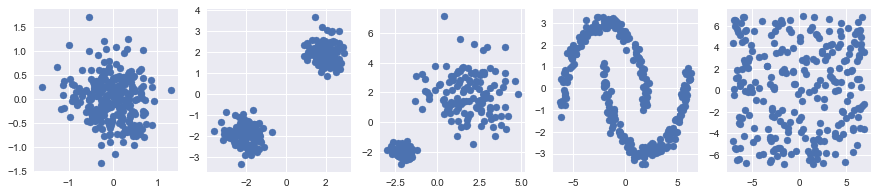

In [68]:
from sklearn.datasets import make_moons, make_blobs

datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, n_samples=255, n_features=2, random_state=13)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], n_samples=255, n_features=2, random_state=13)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3], n_samples=255, n_features=2, random_state=13)[0],
    4. * (make_moons(n_samples=255, noise=.05, random_state=0)[0] - np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(255, 2) - 0.5)
]

fig, ax = plt.subplots(ncols = len(datasets), figsize=(len(datasets)*3, 3))
for i in range(len(datasets)):
    ax[i].scatter(datasets[i][:, 0], datasets[i][:, 1]);

Добавим шум

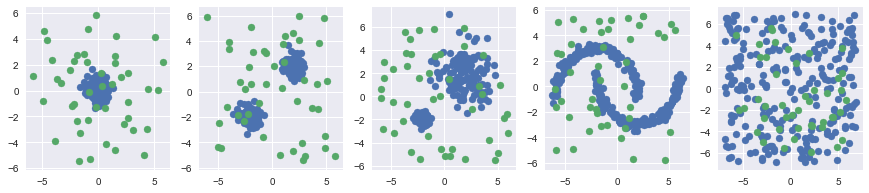

In [69]:
fig, ax = plt.subplots(ncols = len(datasets), figsize=(len(datasets)*3, 3))
    
np.random.seed(123)
for i in range(len(datasets)):
    datasets[i] = np.concatenate([datasets[i], np.random.uniform(low=-6, high=6, size=(45, 2))], axis=0)
    ax[i].scatter(datasets[i][:255, 0], datasets[i][:255, 1]);
    ax[i].scatter(datasets[i][255:, 0], datasets[i][255:, 1]);

In [70]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

### Local Outlier Factor

### Задание 6

Найдите аномалии с помощью Local Outlier Factor, раскрасте аномальные точки отличным цветом на графике. Доля аномалий - 15%.

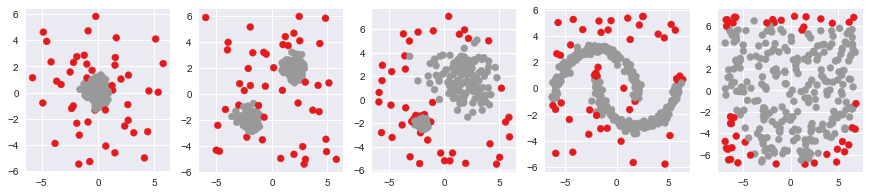

In [71]:
fig, ax = plt.subplots(ncols = len(datasets), figsize=(len(datasets)*3, 3))
for i in range(len(datasets)):
    # choose dataset
    X = datasets[i]

    # find anomalies
    sd = LocalOutlierFactor(contamination=0.15)
    y_pred = sd.fit_predict(X)
    
    # draw scatter plot
    ax[i].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='Set1')

### One-Class SVM

### Задание 7

Найдите аномалии с помощью One-Class SVM c линейныс ядром и ядром 'rbf', раскрасте аномальные точки отличным цветом на графике. Доля аномалий - 15%.

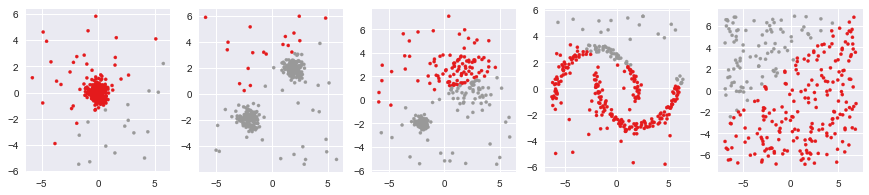

In [75]:
fig, ax = plt.subplots(ncols = len(datasets), figsize=(len(datasets)*3, 3))
for i in range(len(datasets)):
    X = datasets[i]
    # svm with linear kernel
    ad = OneClassSVM(kernel='linear', nu=0.15)
    y_pred = ad.fit_predict(X)
    # scatter plot
    ax[i].scatter(X[:, 0], X[:, 1], s=10, c=y_pred, cmap='Set1')

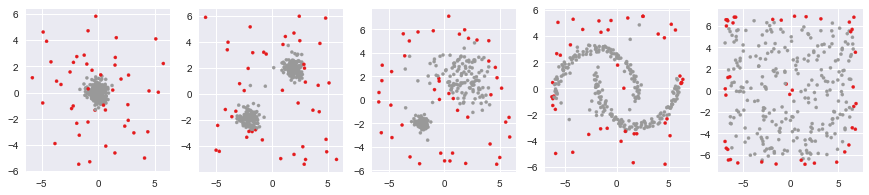

In [76]:
fig, ax = plt.subplots(ncols = len(datasets), figsize=(len(datasets)*3, 3))
for i in range(len(datasets)):
    X = datasets[i]
    # svm with rbf kernel
    ad = OneClassSVM(kernel='rbf', nu=0.15)
    y_pred = ad.fit_predict(X)    
    # scatter plot
    ax[i].scatter(X[:, 0], X[:, 1], s=10, c=y_pred, cmap='Set1')    

### Isolation Forest

### Задание 8

Найдите аномалии с помощью Isolation Forest. Попробуйте от 5 до 20% аномалий.

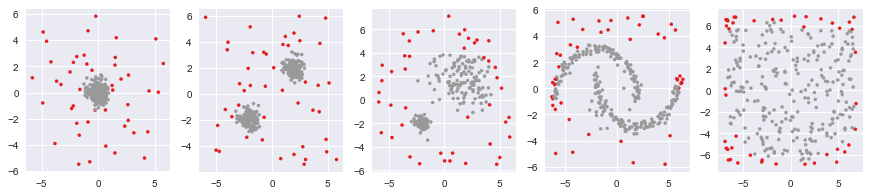

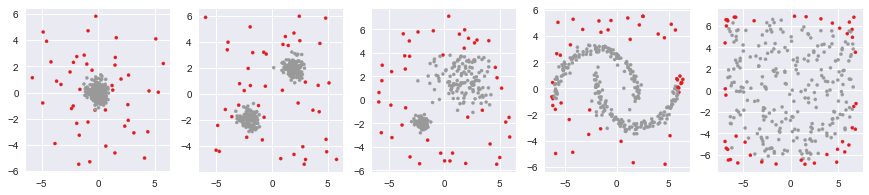

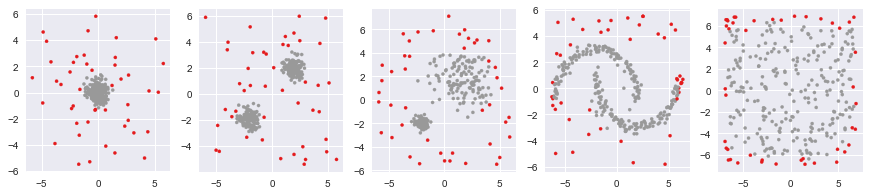

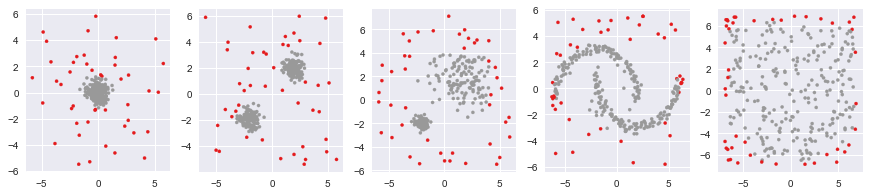

In [78]:
# YOUR CODE HERE
for j in [0.05, 0.1, 0.15, 0.2]:
    fig, ax = plt.subplots(ncols = len(datasets), figsize=(len(datasets)*3, 3))
    for i in range(len(datasets)):
        X = datasets[i]
        # find anomalies        
        i_forest = IsolationForest(contamination=0.15)
        y_pred = i_forest.fit_predict(X)    
        # scatter plot
        ax[i].scatter(X[:, 0], X[:, 1], s=10, c=y_pred, cmap='Set1')    